# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
%pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 610
['grytviken', 'colon', 'afaahiti', 'manggar', 'ilulissat', 'santa rita', 'makurdi', 'port-aux-francais', 'carnarvon', 'port mathurin', 'talnakh', "'ohonua", 'qaqortoq', 'amahai', 'yreka', 'edinburgh of the seven seas', 'bethel', 'yellowknife', 'saint-francois', 'castillos', 'dunedin', 'waitangi', 'petropavlovsk-kamchatsky', 'zouerate', 'utrik', 'puerto natales', 'kodiak', 'carutapera', 'udachny', 'vilyuchinsk', 'birur', 'puerto ayora', 'cabedelo', 'victorica', 'crane', 'fort bragg', 'pelotas', 'babayevo', 'thompson', 'raduzhny', 'iqaluit', 'ledbury', 'vorgashor', 'invercargill', 'khandyga', 'port isabel', 'sisimiut', 'lompoc', 'port-cartier', 'adamstown', 'papatowai', 'tazovsky', 'uturoa', 'nagqu', 'rongelap', 'pundong', 'hun', 'kapuskasing', 'praia da vitoria', 'ushuaia', 'blackmans bay', 'nizhniy odes', 'guilmaro', 'mumbwa', 'severo-yeniseyskiy', 'aasiaat', 'beau vallon', 'bredasdorp', 'lihue', 'novohrad-volynskyi', 'ambodifotatra', 'san buenaventura

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
#Example API call from API documentation https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
       print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | colon
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | manggar
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | santa rita
Processing Record 7 of Set 1 | makurdi
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | amahai
Processing Record 15 of Set 1 | yreka
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | saint-francois
Processing Record 20 of Set 1 | castillos
Processing Record 21 of Set 1 | dunedin
Processing Record 22 of Set

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-7.06,82,15,4.46,GS,1691461834
1,colon,9.3592,-79.9014,23.84,91,100,1.34,PA,1691461834
2,afaahiti,-17.7500,-149.2833,27.93,79,88,5.28,PF,1691461835
3,manggar,-2.8833,108.2667,28.89,70,35,7.18,ID,1691461836
4,ilulissat,69.2167,-51.1000,7.01,65,20,0.00,GL,1691461836


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-7.06,82,15,4.46,GS,1691461834
1,colon,9.3592,-79.9014,23.84,91,100,1.34,PA,1691461834
2,afaahiti,-17.7500,-149.2833,27.93,79,88,5.28,PF,1691461835
3,manggar,-2.8833,108.2667,28.89,70,35,7.18,ID,1691461836
4,ilulissat,69.2167,-51.1000,7.01,65,20,0.00,GL,1691461836


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

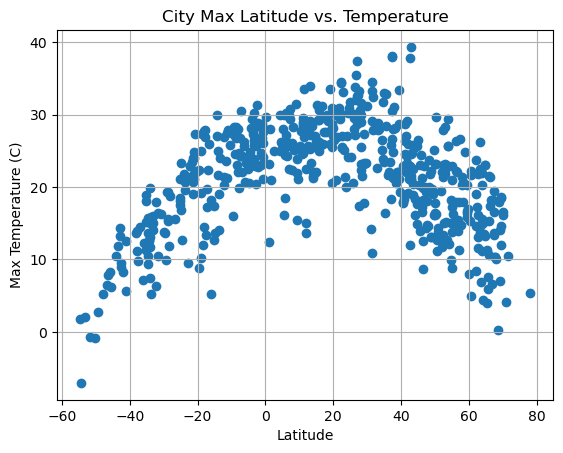

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

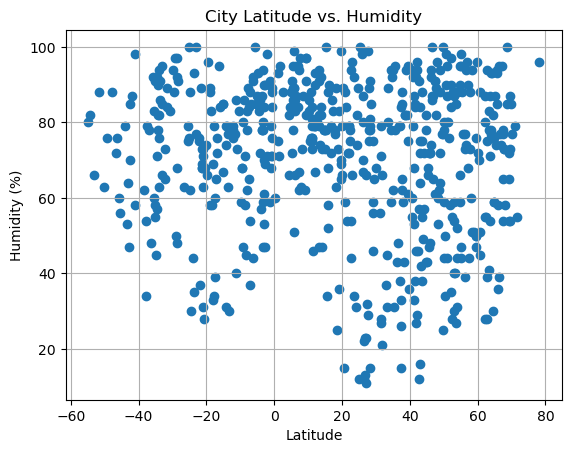

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df["Humidity"], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

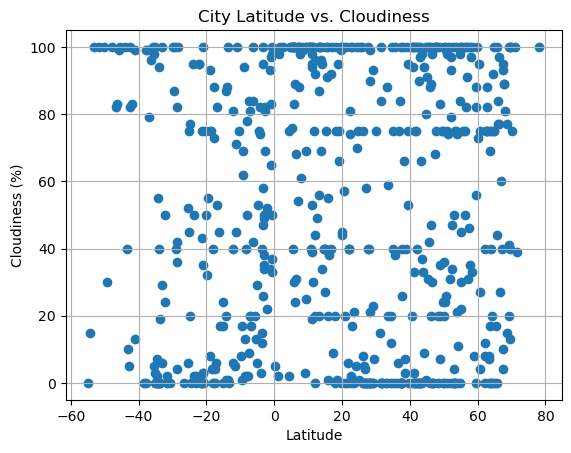

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

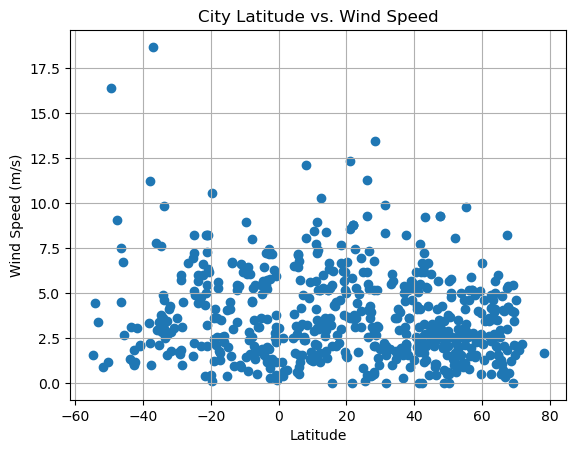

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [119]:
# Define a function to create Linear Regression plots
def lin_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, xy=(0, intercept), xycoords='axes points', annotation_clip=False, fontsize=15, color='red', alpha=1)
    plt.scatter(x_values, y_values)
    plt.xlabel('Latitude')
    plt.show()
    print(f'The r-value is: {rvalue**2}')

In [120]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,colon,9.3592,-79.9014,23.84,91,100,1.34,PA,1691461834
4,ilulissat,69.2167,-51.1000,7.01,65,20,0.00,GL,1691461836
6,makurdi,7.7411,8.5121,22.43,97,98,2.41,NG,1691461837
10,talnakh,69.4865,88.3972,18.45,54,100,2.10,RU,1691461839
11,qaqortoq,60.7167,-46.0333,4.91,88,4,1.27,GL,1691461839


In [121]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-7.06,82,15,4.46,GS,1691461834
2,afaahiti,-17.7500,-149.2833,27.93,79,88,5.28,PF,1691461835
3,manggar,-2.8833,108.2667,28.89,70,35,7.18,ID,1691461836
5,santa rita,-7.1139,-34.9781,24.37,88,20,2.06,BR,1691461837
7,port-aux-francais,-49.3500,70.2167,2.75,76,30,16.38,TF,1691461838


###  Temperature vs. Latitude Linear Regression Plot

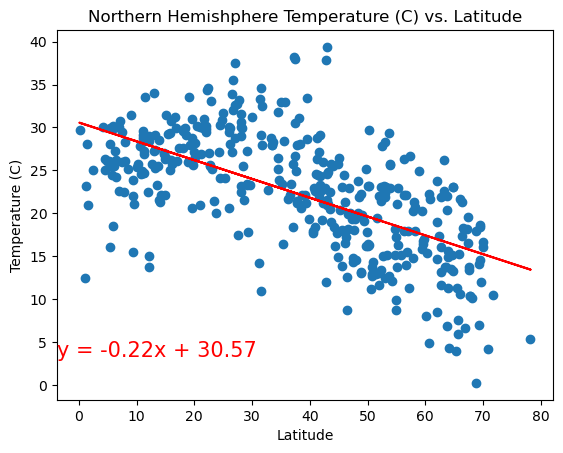

The r-value is: 0.3867409079062995


In [122]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.ylabel('Temperature (C)')
plt.title('Northern Hemishphere Temperature (C) vs. Latitude')
lin_regression(x_values, y_values)



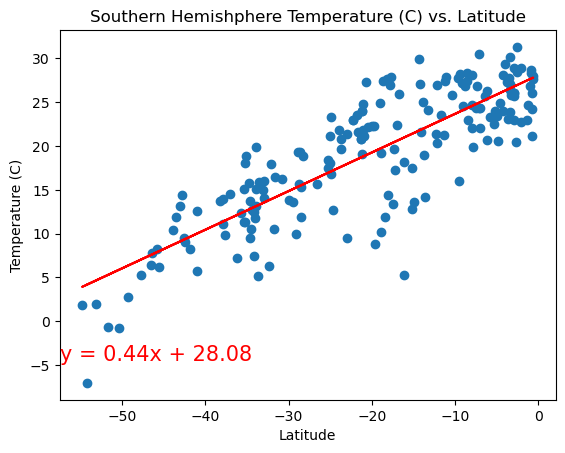

The r-value is: 0.6981163389559871


In [123]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.ylabel('Temperature (C)')
plt.title('Southern Hemishphere Temperature (C) vs. Latitude')
lin_regression(x_values, y_values)

**Discussion about the linear relationship:** As you get closer to equator, the temperature increases. It's interesting that r-value is more closely correlated between latitude and temperature in the northern hemishpere vs. r-value in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

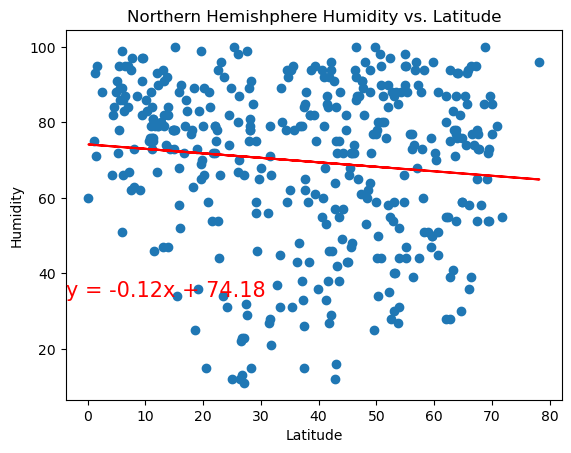

The r-value is: 0.011887893610911499


In [124]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.ylabel('Humidity')
plt.title('Northern Hemishphere Humidity vs. Latitude')
lin_regression(x_values, y_values)

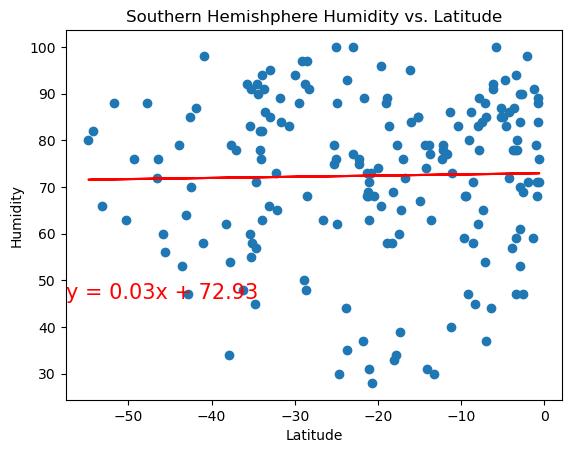

The r-value is: 0.00043901745904846004


In [125]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.ylabel('Humidity')
plt.title('Southern Hemishphere Humidity vs. Latitude')
lin_regression(x_values, y_values)

**Discussion about the linear relationship:** The linear regression model is suggesting this is relatively litte no correlation or relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

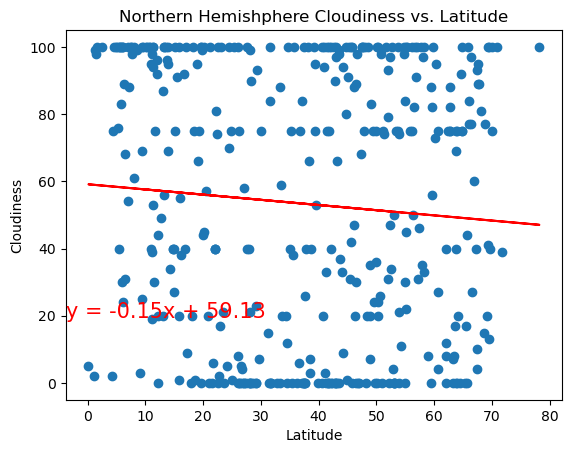

The r-value is: 0.005855500561442742


In [126]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.title('Northern Hemishphere Cloudiness vs. Latitude')
plt.ylabel('Cloudiness')
lin_regression(x_values, y_values)

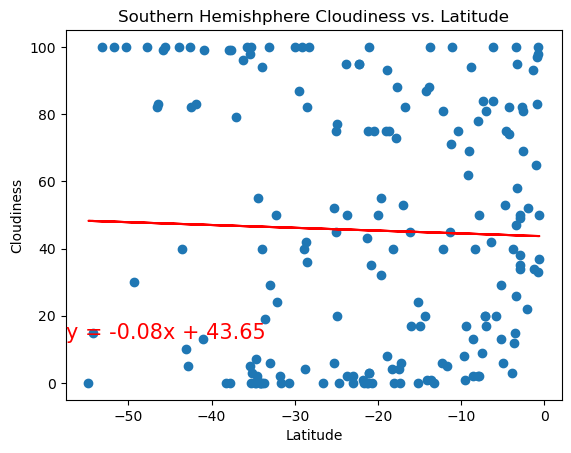

The r-value is: 0.0010215368470874685


In [127]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.title('Southern Hemishphere Cloudiness vs. Latitude')
plt.ylabel('Cloudiness')
lin_regression(x_values, y_values)

**Discussion about the linear relationship:** There is little correlation between latitude and cloudiness in either southern or northern hemishpheres. The latitude has little predictive value in relation to cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

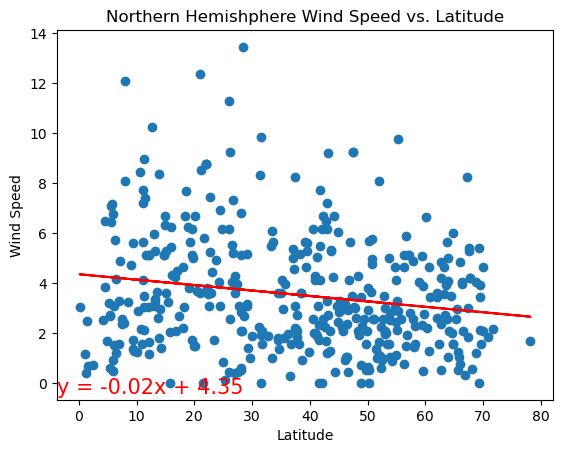

The r-value is: 0.03318923675207241


In [128]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.title('Northern Hemishphere Wind Speed vs. Latitude')
plt.ylabel('Wind Speed')
lin_regression(x_values, y_values)

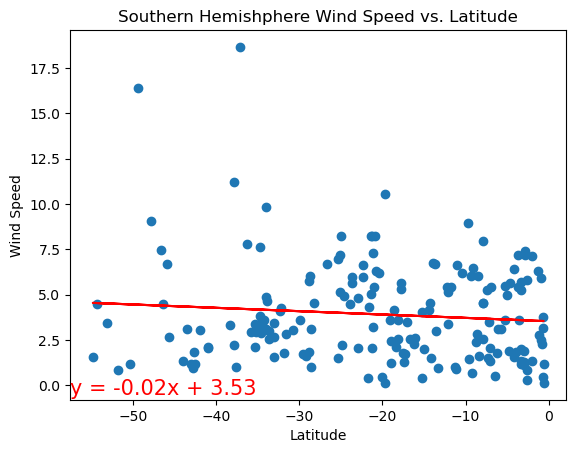

The r-value is: 0.009352273528262064


In [129]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.title('Southern Hemishphere Wind Speed vs. Latitude')
plt.ylabel('Wind Speed')
lin_regression(x_values, y_values)

**Discussion about the linear relationship:** There is a stronger relationship between latitude and wind speed in the northern hemisphere vs. the southern hemisphere. But overall, very little relationship between wind speed and latitude.